# Linear regression

##  Linear regression with numpy 

### Import Packages and data

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import statsmodels.api as sm
import warnings


In [123]:
from IPython.core.interactiveshell import InteractiveShell
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [124]:
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"
data_1 = "C:/Users/fourz/OneDrive/Рабочий стол/Статистика/линейная регрессия/Linear regression all mhetods/FIle_1_for_linear.txt"

In [125]:
df_1 = pd.read_csv(data_1, names = ["x_train", "y_train"])
df_1.sample(5)

,x_train,y_train
54,6.3328,1.42330
96,5.4369,0.61705
76,7.5386,3.88450
73,7.2259,3.34110
28,13.1760,14.69200


In [126]:
df_1.describe()

,x_train,y_train
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Plot data

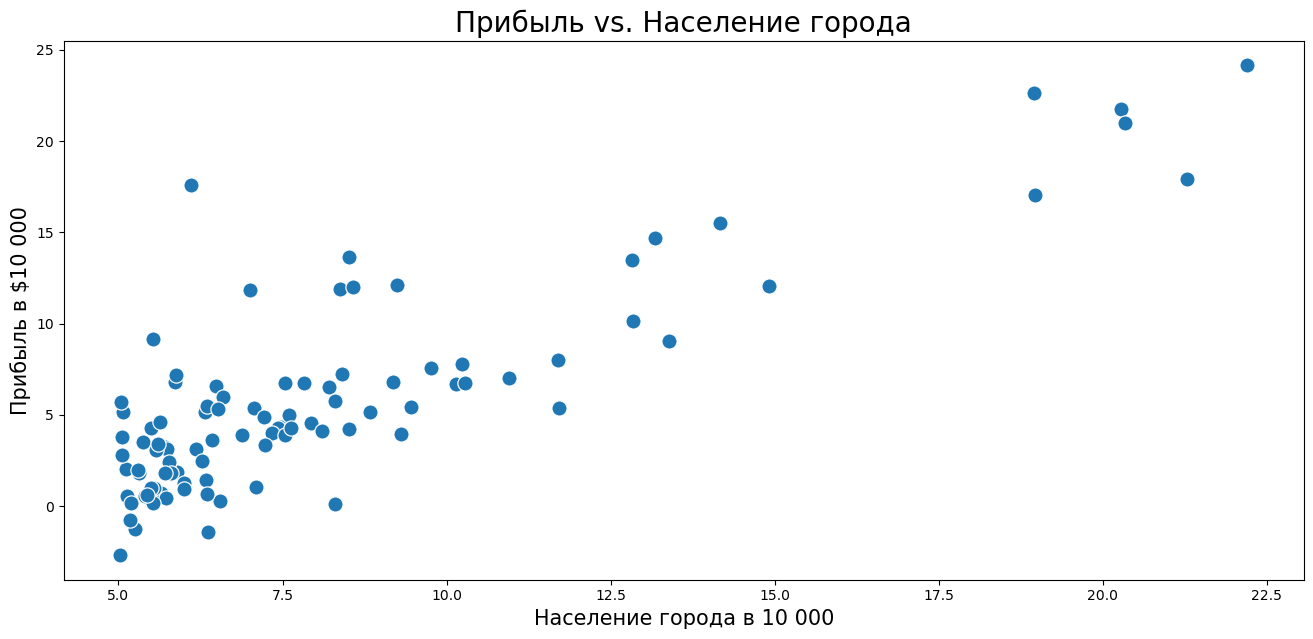

In [127]:
fig, axs = plt.subplots(1, 1, figsize=(16, 7))
sns.scatterplot(
    x="x_train",
    y="y_train", 
    data=df_1,
    ax=axs,
    s=120
)
plt.title("Прибыль vs. Население города", fontsize=20)
plt.ylabel('Прибыль в $10 000', fontsize=15)
plt.xlabel('Население города в 10 000', fontsize=15)
plt.show();


### Функция потерь MSE

In [128]:
def cost_function(X, y, w, b) -> float:
    '''
    Расчет функции потерь MSE  
    
    Args:
        X (ndarray (m,)) : популяция в городе 
        y (ndarray (m,)) : месячная выручка  
        w (scalar)       : параметр наклона или зависимый член функции 
        b (scalar)       : параметр перехвата или независимый член функции
      
    return:
        total_cost
    '''
    
    m = X.shape[0]
    total_cost = 0.
    cost = 0.
    
    # Loss function
    for i in range(m):
        y_hat = np.dot(w, X[i]) + b
        cost += (y_hat - y[i]) ** 2
        
    total_cost = cost / (2 * m)
    
    return total_cost

#### Результат работы функции

In [129]:
initial_w = 2
initial_b = 1

cost = cost_function(
    df_1.x_train.values,
    df_1.y_train.values,
    initial_w,
    initial_b
)
print(cost)

75.20338497891959


###  Расчет градиента по функции потерь MSE

In [130]:
def gradient_function(X, y, w, b) -> tuple([float, float]):
    """
    Вычисляет градиент для линейной регрессии регрессии 
 
    Args:
      X : (ndarray (m,)) :  Популяция в городе
      y : (ndarray (m,)) :  Месячная выручка в городе  
      w : (scalar) :   параметр наклона или зависимый член функции       
      b : (scalar) :   параметр перехвата или независимый член функции
      
    Returns
      derivative_w: (scalar) : Градиент параметра w 
      derivative_b: (scalar) : Градиент параметра b 
      
    """
    m = X.shape[0]
    derivative_w = 0.
    derivative_b = 0.
    
    for i in range(m):
        y_hat = np.dot(w, X[i]) + b
        
        derivative_w_i = (y_hat - y[i]) * X[i]
        derivative_b_i = (y_hat - y[i])
        
        derivative_b += derivative_b_i
        derivative_w += derivative_w_i
        
    derivative_b = derivative_b / m
    derivative_w = derivative_w / m
    
    return derivative_w, derivative_b


#### Результат работы функции

In [131]:

initial_w = 0.
initial_b = 0.

tmp_dj_dw, tmp_dj_db = gradient_function(
    df_1.x_train.values,
    df_1.y_train.values,
    initial_w,
    initial_b
)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


### Learning parameters using gradient descent

In [132]:
def compute_gradient_descent(
        X, y, w, b,  
        cost_function,
        gradient_function,
        alpha,
        num_iters
      ) -> tuple([float, float, list[float], list[float]]):
    """
   Выполняет пакетный градиентный спуск. Пошагово обновляет веса функции,
   с альфа-скоростью обучени
    
    Args:
      x : (ndarray (m,)) :   Популяция в городе 
      y : (ndarray (m,)) :   Месячная выручка 
      w : (scalar) :    параметр наклона или зависимый член функции       
      b : (scalar) :    параметр перехвата или независимый член функции
      
      
      gradient_function:     функция для расчета градиента
      cost_function:         функция потерь
      alpha :                Скорость обучения или шаг
      num_iters :            кол-во итераций для градиентного спуска
      
    Returns:
      w : подогнанный параметр наклона с помощью грудиентного спуска 
      b : подобранный параметр перехвата с помощью градиентного спуска
    """
    
    m = X.shape[0]
    J_history = []
    W_history = []
    
    for i in range(num_iters):
        derivative_w, derivative_b = gradient_function(X, y, w, b)
        
        w -= alpha * derivative_w
        b -= alpha * derivative_b
        
        if i < 100000:
            cost = cost_function(X, y, w, b)
            J_history.append(cost)
            
        if i % math.ceil(num_iters / 10) == 0:
            W_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
        
    return w, b, J_history, W_history

#### Check function results

In [133]:
initial_w = 0.
initial_b = 0.
iterations = 2000
alpha = 0.01

slope, intercept, J_history ,_ = compute_gradient_descent(
    df_1.x_train.values,
    df_1.y_train.values,
    initial_w, initial_b,   # Веса модели
    cost_function,          # Гиперпараметры 
    gradient_function,      # Гиперпараметры 
    alpha, iterations       # Гиперпараметры 
)

print("w,b найденные с помощью градиентного спуска:", slope, intercept)

Iteration    0: Cost     6.74
Iteration  200: Cost     5.17


Iteration  400: Cost     4.82
Iteration  600: Cost     4.64
Iteration  800: Cost     4.56
Iteration 1000: Cost     4.52
Iteration 1200: Cost     4.50
Iteration 1400: Cost     4.49
Iteration 1600: Cost     4.48
Iteration 1800: Cost     4.48
w,b найденные с помощью градиентного спуска: 1.182212774757377 -3.7880685727231103


### График функции потерь

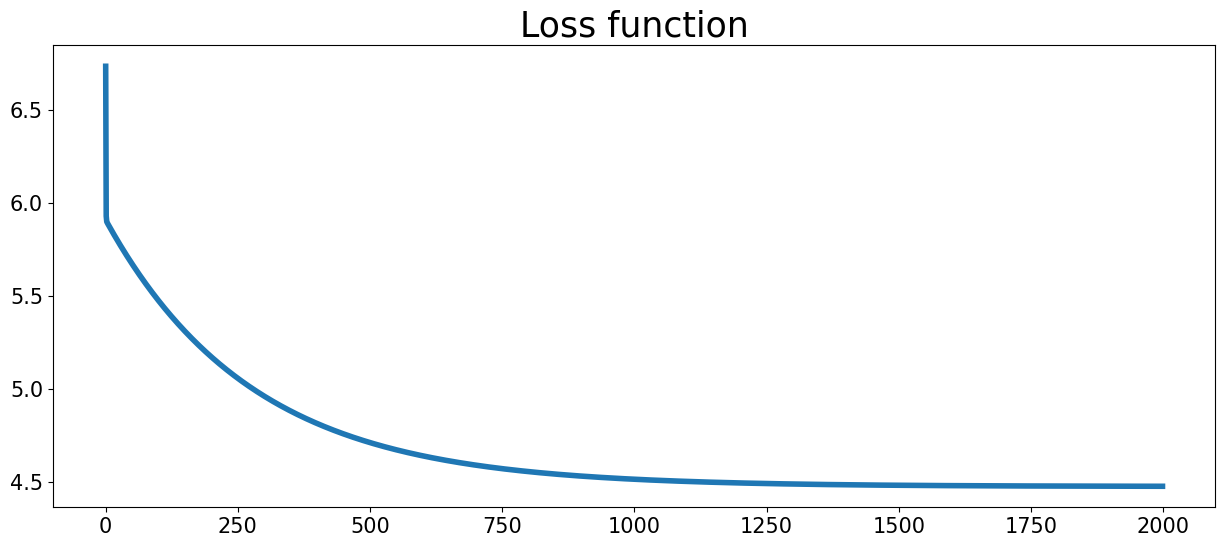

In [134]:
plt.subplots(figsize=(15, 6))
plt.plot(J_history, label='Loss function', linewidth = 4)
plt.title("Loss function", fontsize = 25)
plt.tick_params(labelsize = 15);


### Расчет предсказаний

In [135]:
def Predicted_values(X, w, b) -> np.array([float]):
    """
    Функция, которая вычисляет вектор прогнозов для регрессионной модели.
    
    Args:
      y : (ndarray (m,)) :   Вектор целевой переменной 
      w : (ndarray (n,)) :   Вектор весов модели 
      b : (scalar) :    Смещение модели 
    
    Returns:
      y_hat : (ndarray (m,)) :   Вектор прогнозов, полученных по формуле y_hat[i] = w * X[i] + b
    """
    
    m = X.shape[0]
    y_hat = np.zeros(m)
    
    for i in range(m):
        y_hat[i] = np.dot(w, X[i]) + b

    return y_hat

### Plot results 

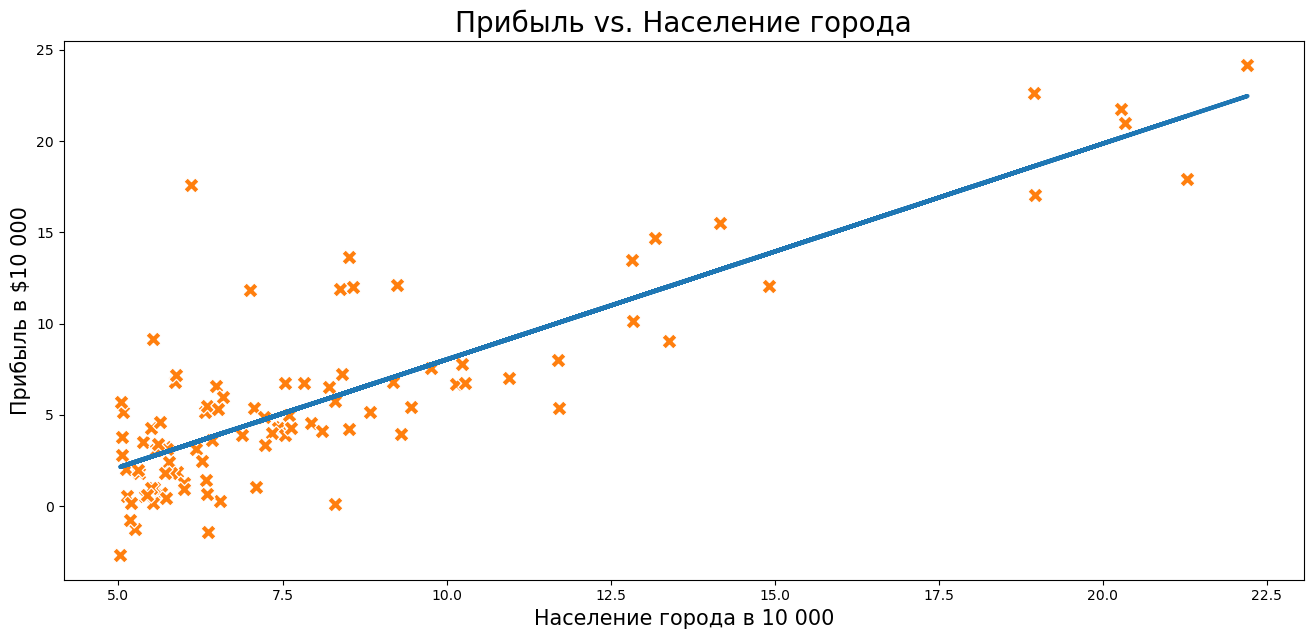

****************************************************************** 

Для населения = 55 000 мы предсказываем прибыль в размере $27141.02
Для населения = 70 000 мы предсказываем прибыль в размере $44874.21
Для населения = 170 000 мы предсказываем прибыль в размере $163095.49 

****************************************************************** 



In [136]:
line = Predicted_values(df_1.x_train.values, slope, intercept)
_, axes = plt.subplots(figsize=(16, 7))

axes.plot(df_1.x_train.values, line, linewidth=3)
sns.scatterplot(
    x="x_train",
    y="y_train", 
    data=df_1,
    s=120,
    color="C1",
    marker="X"
)

plt.title("Прибыль vs. Население города", fontsize = 20)
plt.ylabel('Прибыль в $10 000', fontsize = 15)
plt.xlabel('Население города в 10 000', fontsize = 15)
plt.show()

predict1 = 5.5 * slope + intercept
predict2 = 7.0 * slope + intercept
predict3 = 17.0 * slope + intercept


print(  "**" * 33,  "\n")
print('Для населения = 55 000 мы предсказываем прибыль в размере $%.2f' % (predict1 * 10000))
print('Для населения = 70 000 мы предсказываем прибыль в размере $%.2f' % (predict2 * 10000))
print('Для населения = 170 000 мы предсказываем прибыль в размере $%.2f' % (predict3 * 10000), "\n")
print( "**" * 33, "\n");


### Расчет коэффициента Детерминации


In [137]:
def coefficient_determination(X, y, w, b) -> float:
    """
    Функция, которая вычисляет коэффициент детерминации для регрессионной модели.

    Args:
        X : (ndarray (m, n)) :   Матрица признаков 
        y : (ndarray (m,)) :   Вектор целевой переменной 
        w : (ndarray (n,)) :   Вектор весов модели 
        b : (scalar) :    Смещение модели 

    Returns:
        R_2 : (scalar) :   Коэффициент детерминации
    """

    m = X.shape[0]
    RSS = 0.
    TSS = 0.
    
    for i in range(m):
        y_hat = np.dot(w, X[i]) + b
        err = (y[i] - y_hat)**2
        RSS += err
        
    for j in range(m):
        delta = (y[j] - y.mean())**2
        TSS += delta
        
    R_2 = 1 - (
        (RSS / m) / (TSS / m)
        )
    return R_2

In [138]:
R_2 = coefficient_determination(df_1.x_train.values, df_1.y_train.values, slope, intercept)
R_2

0.70196125528343

###  95-и % доверительный интервал для коэффициента детерминации

In [139]:
def coinfidence_interval_R(R_coef, data) -> np.array([float, float]):
    """
    Функция, которая вычисляет доверительный интервал для коэффициента детерминации.

    Args:
        R_coef : (scalar) :   Коэффициент корреляции Пирсона между двумя переменными 
        data : (ndarray (m, 2)) :   Массив данных, содержащий значения двух переменных 

    Returns:
        C_interval : (ndarray (2,)) :   Массив из двух чисел, обозначающих нижнюю и верхнюю границы доверительного интервала
    """
    c = np.array([-1, 1])
    t_tab = 1.9847232
    margin_err = (1 - R_coef) / len(data)
    C_interval = R_coef + c * margin_err * t_tab
    
    return C_interval

In [140]:
coinfidence_interval_R(R_2, df_1)

array([0.69586307, 0.70805945])

### Проверка распредления остатков 

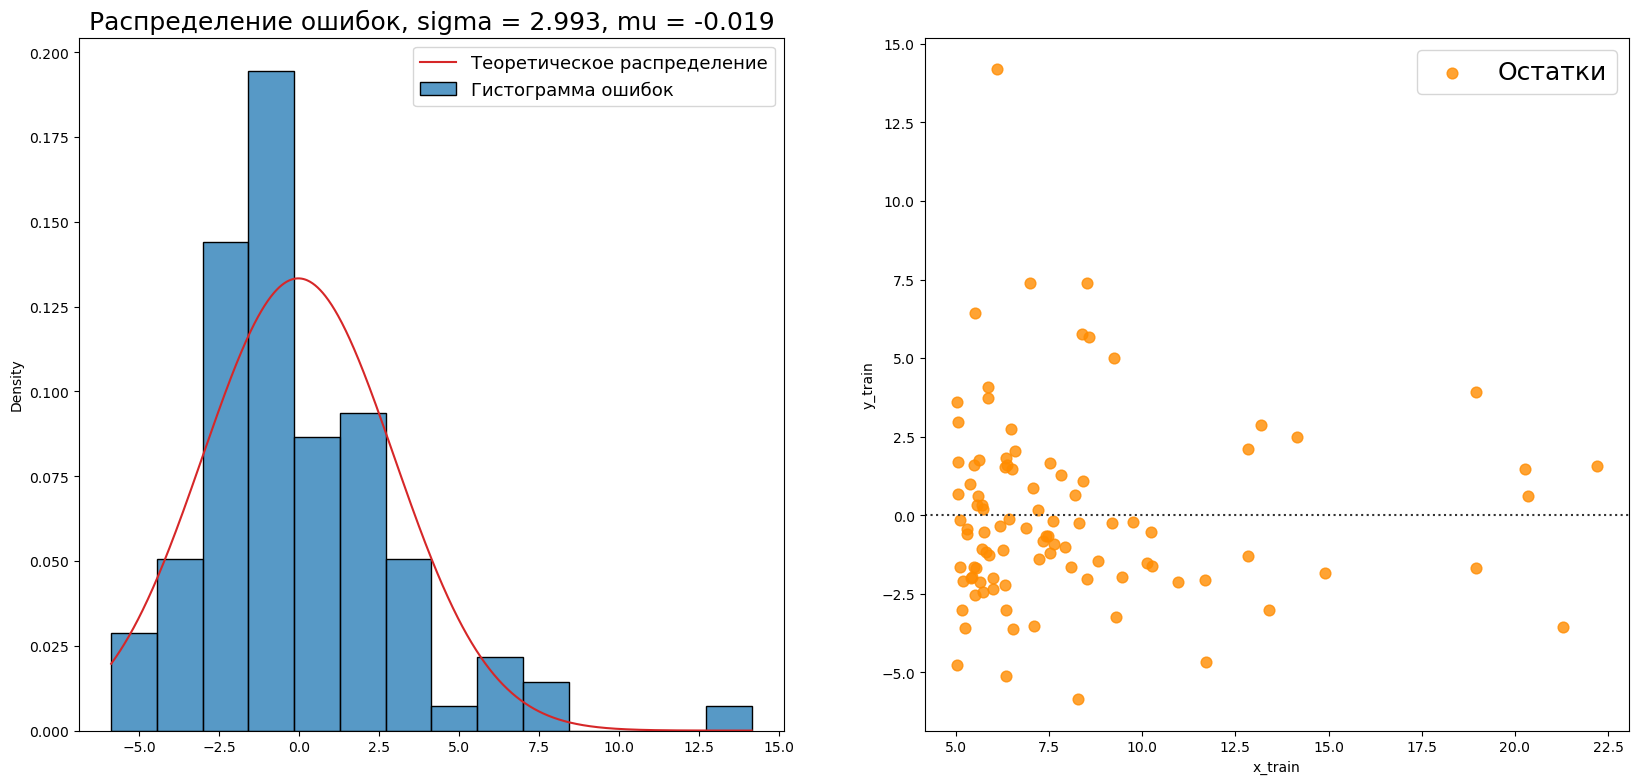

In [141]:
errors = df_1.y_train.values - Predicted_values(df_1.x_train.values, slope, intercept)   # Остатки

# Предположим нормальность остатков и найдем параметры
sigma_param = np.std(errors)
mu_param = np.mean(errors)
# normal = lambda x: 1/np.sqrt(2 * np.pi * sigma_param ** 2) * np.exp( - (x - mu_param) ** 2/(2 * sigma_param ** 2))
grid = np.linspace(np.min(errors), np.max(errors), 1000)


_, axs = plt.subplots(1, 2,figsize=(20, 9))
sns.histplot(
    data=errors,
    stat="density",
    element="bars",
    common_norm=False,
    label="Гистограмма ошибок",
    ax=axs[0]
)
sns.residplot(
    data=df_1,
    x="x_train",
    y="y_train",
    lowess=False,
    robust=False,
    label="Остатки",
    scatter_kws={'s': 60, 'color': 'darkorange'},
    ax=axs[1]
)

axs[0].set_title(f"""Распределение ошибок, sigma = {sigma_param.round(3)}, mu = {mu_param.round(3)}""", fontsize=18)
axs[0].plot(grid, norm.pdf(grid, mu_param, sigma_param), label="Теоретическое распределение", color="C3",)

axs[0].legend(fontsize=13)
axs[1].legend(fontsize=18)

plt.show();

### Проверка адекватности модели с помощью критерия фишера

- **H0 утверждает: что выбранный набор независимых переменных Х не оказывает значимого статистического влияния на переменную Y**

- **H1 утверждает: что существует хотя бы один фактор, значимо влияющий на зависимую переменную.**

In [142]:
def Fisher_test(X, y, w, b) -> None:
    """
    Проводит тест Фишера для регрессионной модели. Сравнивает расчетную статистику F_calc с табличным значением F_table
    и делает вывод о значимости коэффициентов модели.
    
    Args:
      X : (ndarray (m, n)) :   Матрица признаков 
      y : (ndarray (m,)) :   Вектор целевой переменной 
      w : (ndarray (n,)) :   Вектор весов модели      
      b : (scalar) :    Смещение модели
      
    Returns:
      Результат теста Фишера: либо отклоняет нулевую гипотезу о равенстве нулю всех коэффициентов модели,
      либо остается с ней. Выводит также значение расчетной статистики F_calc.

    """
    dfn, dfd = X.shape[0] - 1, X.shape[0] - 2 # степени свободы
    m = X.shape[0]
    
    SSE = 0. #  (Sum of Squared Error)
    SST = 0. # (Sum of Squared Total)
    
    # Расчет квадрата ошибок 
    for i in range(m):
        y_hat = np.dot(w, X[i]) + b
        err = (y[i] - y_hat)**2
        SSE += err
    
    # Расчет дисперсии для y_train
    for j in range(m):
        delta = (y[j] - y.mean())**2
        SST += delta
        
    MST = (SST / (dfn))  # Маштабируем дисперсию 
    MSE = (SSE / (dfd))  # Маштабируем квадраты остатков 
    
    # РАсчет критерия фишера
    F_calc = MST / MSE
    F_table = st.f.ppf(0.95, dfn, dfd, loc=0, scale=1) # Взятие табличного значения критерия фишера
    
    if F_calc >= F_table:
        print("Откланяем нулевую гипотезу", F_calc)
    else:
        print("Остаемся с нулевой гипотезой", F_calc)
    
    return 

In [143]:
Fisher_test(df_1.x_train.values, df_1.y_train.values, slope, intercept)

Откланяем нулевую гипотезу 3.3203177468567424


### Метрики регресии 

In [144]:
def regression_error_metrics(X, y, w, b, predict, my_model = ""):
    """
    Вычисляет различные метрики ошибок для регрессионной модели.
    
    Args:
      X : (ndarray (m, n)) :   Матрица признаков 
      y : (ndarray (m,)) :     Вектор целевой переменной 
      w : (ndarray (n,)) :     Вектор весов модели 
      b : (scalar) :           Смещение модели 
      predict - функция, которая принимает X, y, w, b и возвращает вектор прогнозов (y_hat)
      my_model - название модели (по умолчанию пусто)
    
    Returns:
      model_error_metrics - словарь, содержащий метрики ошибок: MSE, RMSE, MAE, MSPE, MAPE
      result - датафрейм pandas, содержащий те же метрики ошибок
    """
    
    m = X.shape[0]
    
    y_hat = predict(X, w, b)
        
    MSE = 1 / m * np.sum((y_hat - y)**2)    
    RMSE = np.sqrt(MSE)
    MAE = (1 / m) * np.sum(abs(y_hat - y))
    MSPE = (1 / m) * np.sum(((y - y_hat)/ y)**2)
    MAPE = (1 / m ) * np.sum(abs((y - y_hat) / y))
    
    result = pd.DataFrame({
        'MSE': MSE,
        'RMSE': RMSE,
        'MAE': MAE,
        'MSPE': "{:.3%}".format(MSPE),
        'MAPE': "{:.3%}".format(MAPE)},
        index=[my_model]
        ) 
    
    
    return result

## Linear regression with scikit-learn

### train test split

In [145]:
seed = 1234
Y = df_1.y_train.values.reshape(-1, 1)
X = df_1.x_train.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, 
    train_size=0.8,
    random_state=seed,
    shuffle=True
    )


### Тренировка модели scikit-learn

In [146]:
Simpl_linear_reg = LinearRegression()
Simpl_linear_reg.fit(X_train, y_train)
y_pred = Simpl_linear_reg.predict(X)
R_tot = Simpl_linear_reg.score(X, Y)
R_test = Simpl_linear_reg.score(X_test, y_test)

LinearRegression()

## Выводы

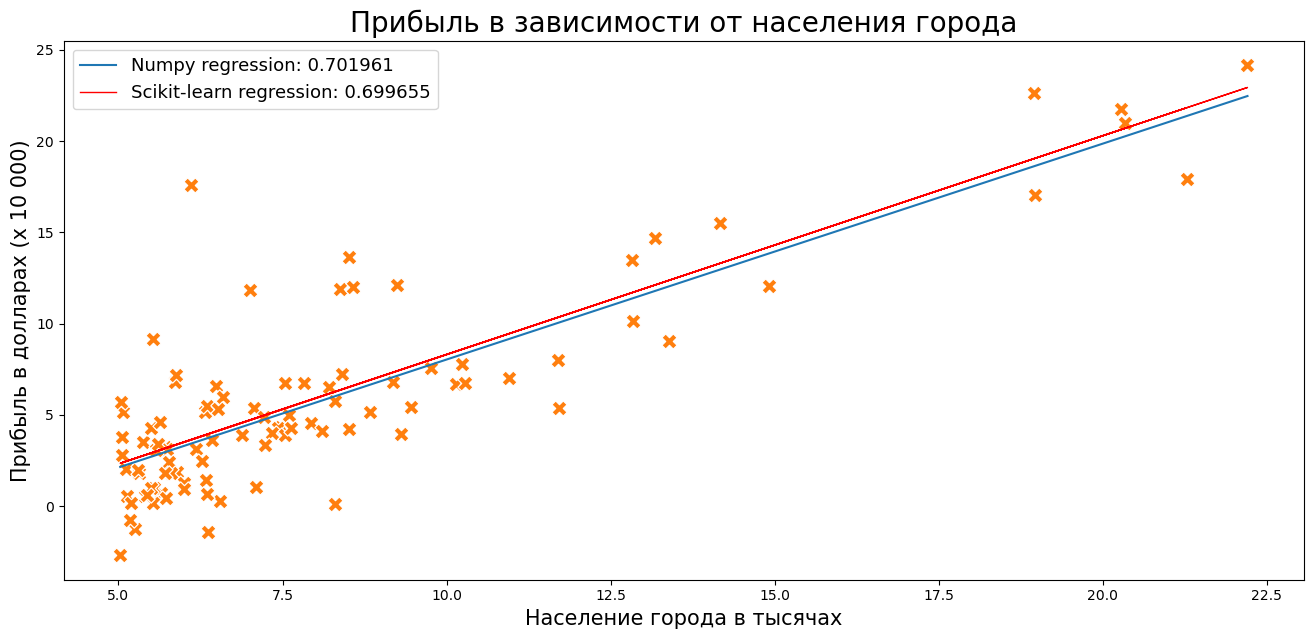

****************************************************************** 

Для населения = 55 000, мы прогнозируем прибыль в $29193.03
Для населения = 70 000, мы прогнозируем прибыль в $47162.75
Для населения = 170 000, мы прогнозируем прибыль в $166960.94 

****************************************************************** 



In [147]:
line_predict = y_pred
_, axes = plt.subplots(figsize=(16, 7))

sns.lineplot(
    x=df_1.x_train.values,
    y=line,
    label="Numpy regression: %f" %(R_2),
    legend=True,
    ax=axes
)

axes.plot(
    df_1.x_train.values,
    line_predict,
    color="r",
    linewidth=1,
    label="Scikit-learn regression: %f"% (R_tot)
)

sns.scatterplot(
    x="x_train",
    y="y_train", 
    data=df_1,
    s=120,
    color="C1",
    marker="X"
)


plt.title("Прибыль в зависимости от населения города", fontsize=20)
plt.ylabel('Прибыль в долларах (x 10 000)', fontsize=15)
plt.xlabel('Население города в тысячах', fontsize=15)
plt.legend(fontsize=13)
plt.show()


predict_scklrn1 = 5.5 * Simpl_linear_reg.coef_ + Simpl_linear_reg.intercept_
predict_scklrn2 = 7.0 * Simpl_linear_reg.coef_ + Simpl_linear_reg.intercept_
predict_scklrn3 = 17. * Simpl_linear_reg.coef_ + Simpl_linear_reg.intercept_

print(  "**" * 33,  "\n")
print('Для населения = 55 000, мы прогнозируем прибыль в $%.2f' % (predict_scklrn1 * 10000))
print('Для населения = 70 000, мы прогнозируем прибыль в $%.2f' % (predict_scklrn2 * 10000))
print('Для населения = 170 000, мы прогнозируем прибыль в $%.2f' % (predict_scklrn3 * 10000), "\n")
print( "**" * 33,  "\n");



In [148]:
# My model
result = regression_error_metrics(
    df_1.x_train.values,
    df_1.y_train.values,
    slope, intercept,
    Predicted_values,
    my_model = "My model"
)

# Scikit learn simple model 
result2 = regression_error_metrics(
    df_1.x_train.values,
    df_1.y_train.values,
    Simpl_linear_reg.coef_,
    Simpl_linear_reg.intercept_,
    Predicted_values,
    my_model = "Scikit learn model"
)

display(result, result2)

,MSE,RMSE,MAE,MSPE,MAPE
My model,8.956055,2.992667,2.20096,2446.762%,155.747%


,MSE,RMSE,MAE,MSPE,MAPE
Scikit learn model,9.02536,3.004224,2.247952,2714.149%,165.706%
